In [2]:
from gensim.models import KeyedVectors

In [3]:
kv = KeyedVectors.load_word2vec_format("C:/LangOn/morphen/data/tencent_d200_500k.bin", binary=True)

In [5]:
len(kv.key_to_index)

500000

In [6]:
kv.most_similar("喜歡")

[('不喜歡', 0.9346516728401184),
 ('歡', 0.91422438621521),
 ('愛', 0.9037278294563293),
 ('討厭', 0.8983715176582336),
 ('覺得', 0.852202832698822),
 ('適合', 0.8369855284690857),
 ('對', 0.8208025097846985),
 ('會', 0.8185665011405945),
 ('喜愛', 0.8149957060813904),
 ('感覺', 0.8137810230255127)]

In [80]:
kv.most_similar("質疑", topn=10)

[('批評', 0.9460675716400146),
 ('懷疑', 0.9034138917922974),
 ('認同', 0.8841872811317444),
 ('爭議', 0.8829306960105896),
 ('不滿', 0.8801727294921875),
 ('反對', 0.8787281513214111),
 ('強調', 0.8716935515403748),
 ('認為', 0.8683846592903137),
 ('解釋', 0.864356517791748),
 ('言論', 0.8606687784194946)]

In [126]:
targets = (["喜歡"] + [x[0] for x in kv.most_similar("喜歡", topn=4)] + 
           ["質疑"] + [x[0] for x in kv.most_similar("質疑", topn=4)] + 
           ["貓"] + [x[0] for x in kv.most_similar("貓", topn=4)] + 
           ["語言"] + [x[0] for x in kv.most_similar("語言", topn=4)])           

In [127]:
import numpy as np
mat = np.vstack([kv.get_vector(x, norm=True) for x in targets])

In [128]:
from sklearn.decomposition import PCA

In [129]:
pca = PCA(2)
proj = pca.fit_transform(mat)

[]

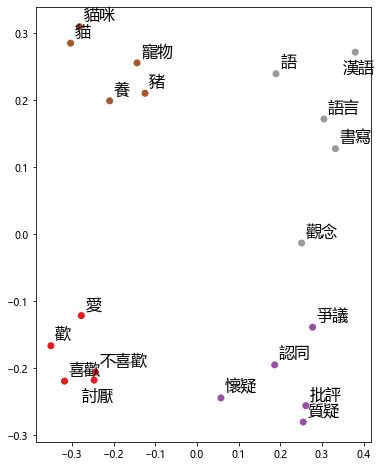

In [136]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Microsoft YaHei"
plt.figure(figsize=(6,8))
plt.scatter(proj[:,0], proj[:,1], c=np.repeat([1,2,3,4], 5), cmap="Set1")
for i in range(len(targets)):
    if targets[i] in ("討厭", "漢語"):
        plt.annotate(targets[i], proj[i,:]-.03, fontsize=16)
    else:
        plt.annotate(targets[i], proj[i,:]+.01, fontsize=16)
plt.plot()

## Word2Vec Anim

In [1]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

In [17]:

class LogCallback(CallbackAny2Vec):
    def __init__(self):
        self.traces = []
        self.losses = []
    def on_epoch_end(self, model):
        vec = model.wv.vectors
        # nvec = vec / np.linalg.norm(vec, axis=-1)[:, np.newaxis]
        nvec = vec.copy()
        self.traces.append(nvec)
        #　print("End: ", model.wv.get_vector("狗"))
        
docs = ["貓 抓 老鼠", "太陽 追 月亮", "貓 抓 金魚", "月亮 追 星星"]
docs = [x.split() for x in docs]
log_callback = LogCallback()
model = Word2Vec(sentences=docs, vector_size=2, min_count=0, alpha=0.05, seed=123,
                 epochs=100, window=2, negative=10, hs=0, sg=1, compute_loss=True, sample=0,
                 shrink_windows=False, 
                 callbacks=[log_callback])

[]

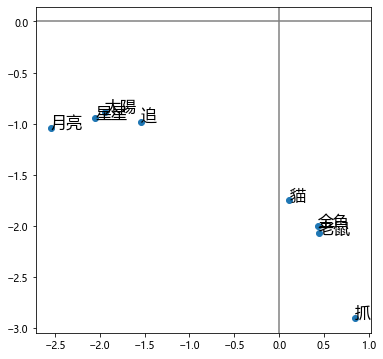

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Microsoft YaHei"

plt.figure(figsize=(6,6))
# vec = model.wv.get_normed_vectors()
vec = model.wv.vectors
vocabs = model.wv.index_to_key
plt.scatter(vec[:,0], vec[:,1])
plt.axvline(0, color='gray')
plt.axhline(0, color='gray')
for i in range(len(vocabs)):
    plt.annotate(vocabs[i], vec[i,:], fontsize=16)
plt.plot()

In [20]:
from tqdm.auto import tqdm
plt.ioff()
for trace_i in tqdm(range(len(log_callback.traces))):
# for trace_i in range(0, 100, 10):
    fig = plt.figure(figsize=(6,6))
    vec = log_callback.traces[trace_i]
    vocabs = model.wv.index_to_key
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.axvline(0, color='gray')
    plt.axhline(0, color='gray')
    plt.scatter(vec[:,0], vec[:,1])
    for i in range(len(vocabs)):
        plt.annotate(vocabs[i], vec[i,:], fontsize=16)    
    plt.savefig(f"../data/traces/trace{trace_i:03d}.jpg")
    plt.close(fig)

  0%|          | 0/100 [00:00<?, ?it/s]